# <center><b>Tutorial 01<br>
https://www.youtube.com/playlist?list=PLdylWCIGC6gebPnAqkoFNbij9bBHbX8__

### <font color = green|>a.) Graph Representation

In [1]:
n = 6
mg = []
for i in range(6):
    temp = []
    for j in range(6):
        temp.append(0)
    mg.append(temp)
       
for item in mg:
    print(item)

[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]


In [2]:
ipt = [[0,1],[0,2],[0,3],[0,4],[1,3],[2,3],[2,4],[2,5],[3,5]]

for (u,v) in ipt:
    mg[u][v] = 1
    mg[v][u] = 1 
    
for item in mg:
    print(item)

[0, 1, 1, 1, 1, 0]
[1, 0, 0, 1, 0, 0]
[1, 0, 0, 1, 1, 1]
[1, 1, 1, 0, 0, 1]
[1, 0, 1, 0, 0, 0]
[0, 0, 1, 1, 0, 0]


### <font color = green|>b.) Graph Traversals | Depth First Search

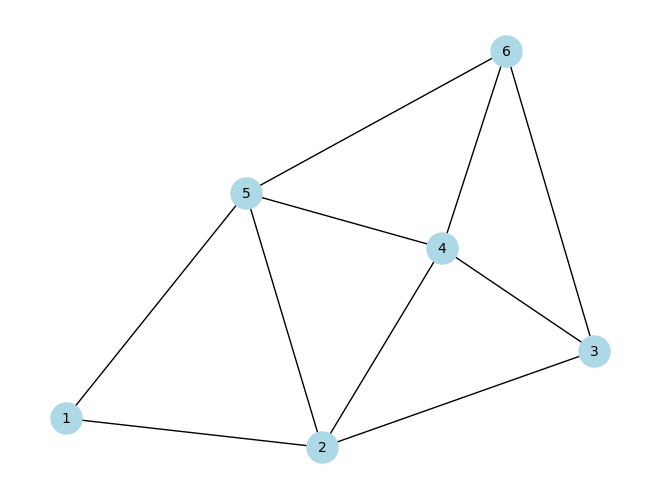

1
2
3
4
5
6


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

def dfs(graph, node, visited=None):
    if visited is None:
        visited = set()
    print(node)
    visited.add(node)
    for child in graph[node]:
        if child not in visited:
            dfs(graph, child, visited)

ipt = [
    [1, 2],
    [1, 5],
    [2, 3],
    [2, 4],
    [2, 5],
    [3, 4],
    [3, 6],
    [4, 5],
    [4, 6],
    [5, 6]
]

n = 6
graph = {}

for i in range(1, n + 1):
    graph[i] = []

for (u, v) in ipt:
    graph[u].append(v)
    graph[v].append(u)

# Create a NetworkX graph
G = nx.Graph()
for u, v in ipt:
    G.add_edge(u, v)

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
plt.show()

# Perform DFS starting from node 1
dfs(graph, 1)


### <font color = green|>c.) Connected Components

{0: {0, 1, 2, 3}, 1: set(), 2: {1, 2}, 3: {3, 4, 5}, 4: {3, 4, 5}, 5: {3, 4, 5, 7}, 6: {8, 6}, 7: set(), 8: {8, 9}, 9: set()} 

After connect each component
[[0, 1, 2, 3, 4, 5, 7], [6, 8, 9]]


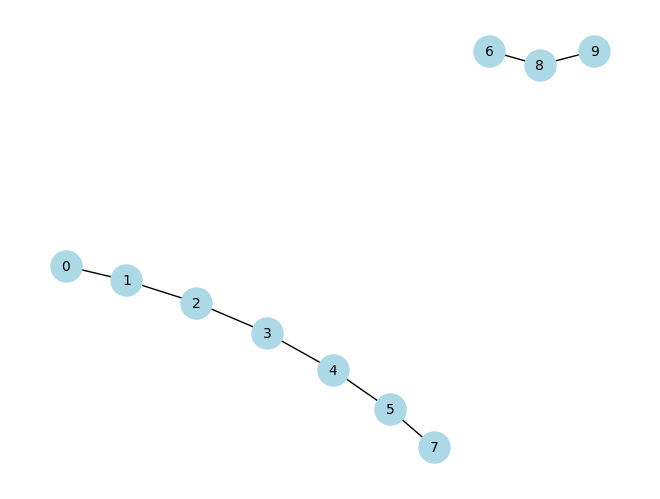

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

def get_connected_group(node, already_seen):
    result = []
    nodes = set([node])
    while nodes:
        node = nodes.pop()
        already_seen.add(node)
        nodes = nodes | (graph[node] - already_seen)
        result.append(node)
    return result, already_seen

def get_all_connected_groups(graph):
    already_seen = set()
    result = []
    for node in graph:
        if node not in already_seen:
            connected_group, already_seen = get_connected_group(node, already_seen)
            result.append(connected_group)
    return result

graph = {
     0: {0, 1, 2, 3},
     1: set(),
     2: {1, 2},
     3: {3, 4, 5},
     4: {3, 4, 5},
     5: {3, 4, 5, 7},
     6: {6, 8},
     7: set(),
     8: {8, 9},
     9: set()
}

components = get_all_connected_groups(graph)
print(graph,'\n')
print('After connect each component')
print(components)

# Create a NetworkX graph
G = nx.Graph()
for component in components:
    for i in range(len(component) - 1):
        G.add_edge(component[i], component[i + 1])

# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
plt.show()


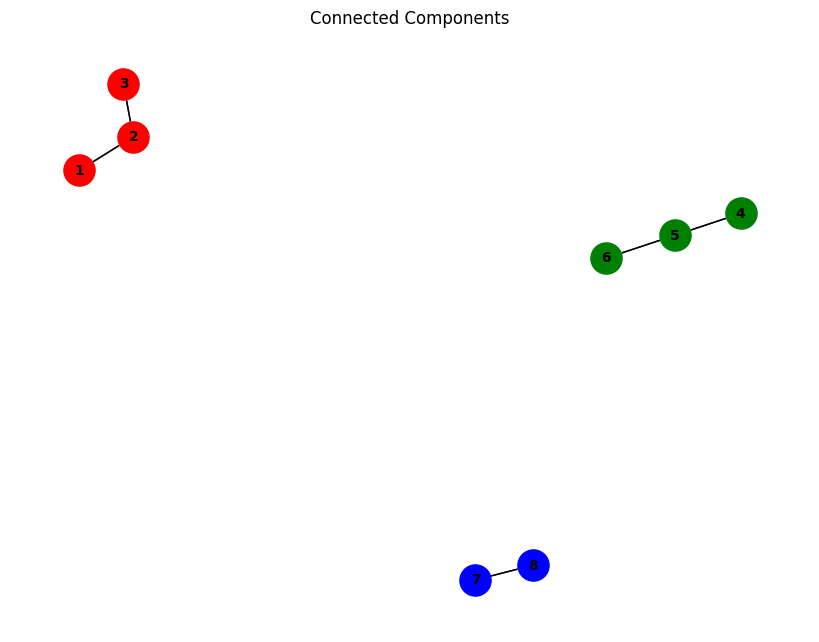

Connected Component 1: {1, 2, 3}
Connected Component 2: {4, 5, 6}
Connected Component 3: {8, 7}


In [5]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a sample graph
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (4, 5), (5, 6), (7, 8)])

# Find connected components
components = list(nx.connected_components(G))

# Plot the graph
pos = nx.spring_layout(G)  # Position the nodes using the spring layout algorithm
plt.figure(figsize=(8, 6))  # Set the figure size

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10, font_color="black", font_weight="bold")
nx.draw_networkx_edges(G, pos, width=1.0, alpha=0.5, edge_color="gray")

# Draw connected components with different colors
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink', 'gray']
for i, component in enumerate(components):
    subgraph = G.subgraph(component)
    nx.draw(subgraph, pos, node_color=colors[i], node_size=500, font_size=10, font_color="black", font_weight="bold")

# Display the plot
plt.title("Connected Components")
plt.axis("off")  # Turn off the axis
plt.show()

# Print the connected components
for i, component in enumerate(components, start=1):
    print(f"Connected Component {i}: {component}")


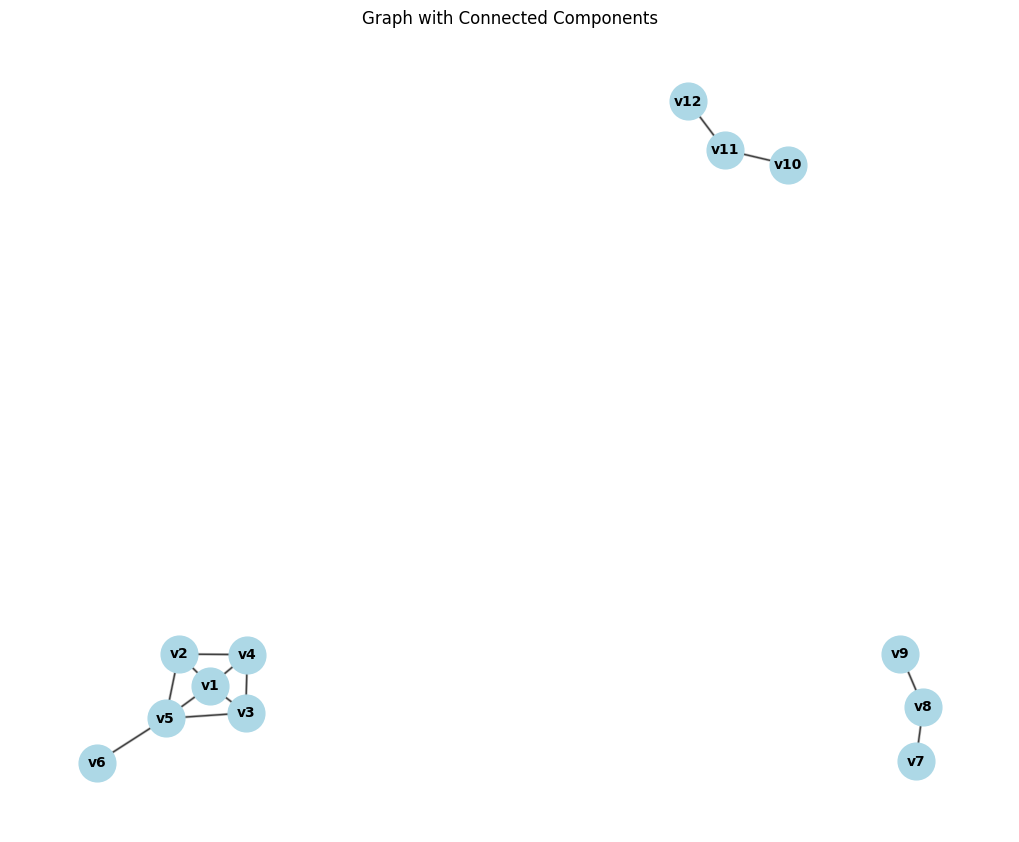

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the vertices and components
vertices = {
    "v1", "v2", "v3", "v4", "v5", "v6", "v7", "v8", "v9", "v10", "v11", "v12"
}

components = [
    ["v1", "v2", "v4"],
    ["v2", "v1", "v3"],
    ["v3", "v1", "v2", "v5", "v6"],
    ["v4", "v1", "v5"],
    ["v5", "v3", "v4"],
    ["v7", "v8", "v9"],
    ["v10", "v11", "v12"]
]

# Create the graph G2
G2 = nx.Graph()

# Add vertices
G2.add_nodes_from(vertices)

# Connect the components
for component in components:
    for i in range(len(component) - 1):
        G2.add_edge(component[i], component[i + 1])

# Plot the graph with increased length
pos = nx.spring_layout(G2, scale=2)  # Increase the scale for longer paths
plt.figure(figsize=(10,8))  # Adjust the figure size

# Draw nodes and edges
nx.draw(G2, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_color="black", font_weight="bold")
nx.draw_networkx_edges(G2, pos, width=2.0, alpha=0.5, edge_color="gray")

# Display the plot
plt.title("Graph with Connected Components")
plt.axis("off")
plt.show()


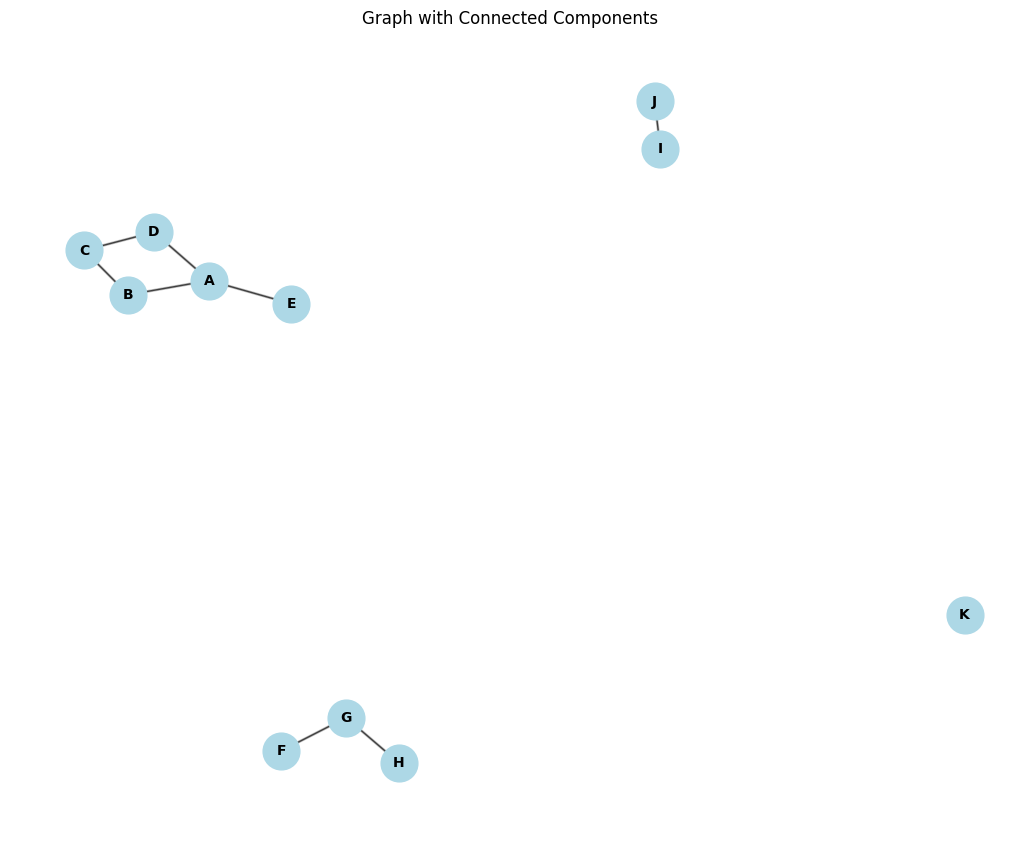

In [7]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the vertices and components
vertices = {
    "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"
}

components = [
    ["A", "B", "C",'D'],
    ["B", "A", "E"],
    ["D", "A", "E"],
    ["F", "G", "H"],
    ["I", "J"],
    ['K']
]

# Create the graph G2
G2 = nx.Graph()

# Add vertices
G2.add_nodes_from(vertices)

# Connect the components
for component in components:
    for i in range(len(component) - 1):
        G2.add_edge(component[i], component[i + 1])

# Plot the graph with increased length
pos = nx.spring_layout(G2, scale=2)  # Increase the scale for longer paths
plt.figure(figsize=(10,8))  # Adjust the figure size

# Draw nodes and edges
nx.draw(G2, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_color="black", font_weight="bold")
nx.draw_networkx_edges(G2, pos, width=2.0, alpha=0.5, edge_color="gray")

# Display the plot
plt.title("Graph with Connected Components")
plt.axis("off")
plt.show()


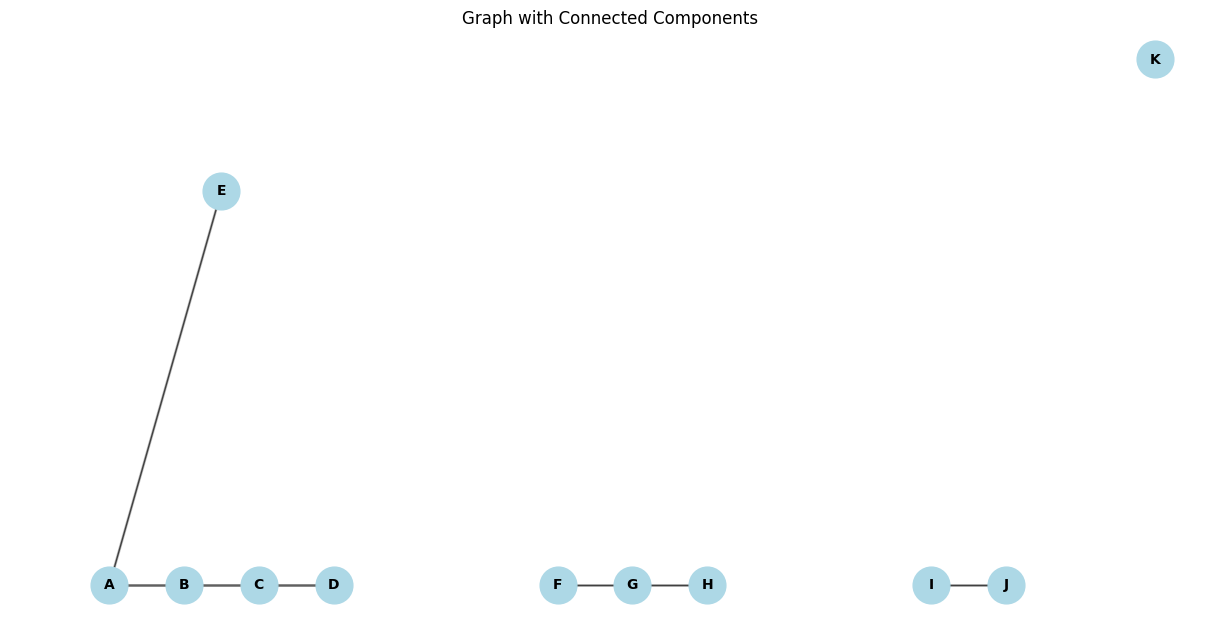

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the vertices and components
vertices = {
    "A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K"
}

components = [
    ["A", "B", "C", 'D'],
    ["B", "A", "E"],
    ["D", "A", "E"],
    ["F", "G", "H"],
    ["I", "J"],
    ['K']
]

# Create the graph G2
G2 = nx.Graph()

# Add vertices
G2.add_nodes_from(vertices)

# Connect the components
for component in components:
    for i in range(len(component) - 1):
        G2.add_edge(component[i], component[i + 1])

# Set positions for each node
pos = {
    "A": (1, 1),
    "B": (2, 1),
    "C": (3, 1),
    "D": (4, 1),
    "E": (2.5, 2.5),
    "F": (7, 1),
    "G": (8, 1),
    "H": (9, 1),
    "I": (12, 1),
    "J": (13, 1),
    "K": (15, 3)
}

# Plot the graph with manual positions
plt.figure(figsize=(12, 6))

# Draw nodes and edges
nx.draw(G2, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_color="black", font_weight="bold")
nx.draw_networkx_edges(G2, pos, width=2.0, alpha=0.5, edge_color="gray")

# Display the plot
plt.title("Graph with Connected Components")
plt.axis("off")
plt.show()

### <font color = green|>d.) Single Source Shortest Path

A 0
B 1
C 1
D 2
E 2
F 2
G 3
H 4
I 4


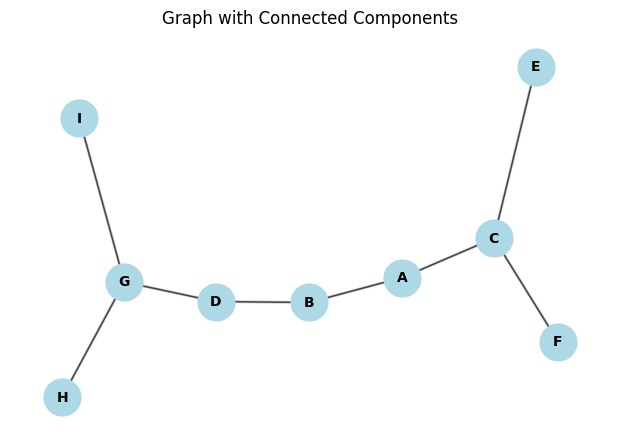

In [9]:
def ssp(graph,node,d,distance,par):
    distance[node] = d
    for child in graph[node]:
        if child!=par:
            ssp(graph=graph,node=child,d=distance[node]+1,distance=distance,par=node)

edges = [['A','B'],['A','C'],['C','E'],['C','F'],['D','B'],['D','G'],['G','H'],['G','I']]
nodes = ['A','B','C','D','E','F','G','H','I']

graph = {}
distance = {}

for key in nodes:
    graph[key] = []
    distance[key] = None

for (u,v) in edges:
    graph[u].append(v)
    graph[v].append(u)

start = 'A'
distance[start] = 0 
ssp(graph=graph,node=start,d=0,distance=distance,par=-1)

for key, value in distance.items():
    print(key,value)
    
# ===================================================================
# Create the graph G2
G2 = nx.Graph()

# Add vertices
G2.add_nodes_from(nodes)

# Connect the components
for component in edges:
    for i in range(len(component) - 1):
        G2.add_edge(component[i], component[i + 1])

# Plot the graph with increased length
pos = nx.spring_layout(G2, scale=2)  # Increase the scale for longer paths
plt.figure(figsize=(6,4))  # Adjust the figure size

# Draw nodes and edges
nx.draw(G2, pos, with_labels=True, node_color="lightblue", node_size=700, font_size=10, font_color="black", font_weight="bold")
nx.draw_networkx_edges(G2, pos, width=2.0, alpha=0.5, edge_color="gray")

# Display the plot
plt.title("Graph with Connected Components")
plt.axis("off")
plt.show()

`The above output show that the shortest source path is starting from node(A) and connect to another component with path distance = 1 unit`

 ### <font color = green|>e.) Bipartite Graph
 `A graph whose vertices can be divided into 2 disjoint sets`

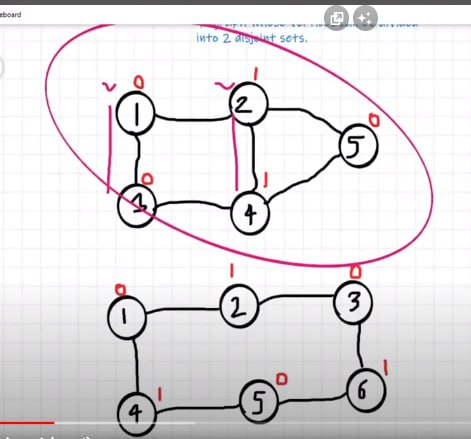

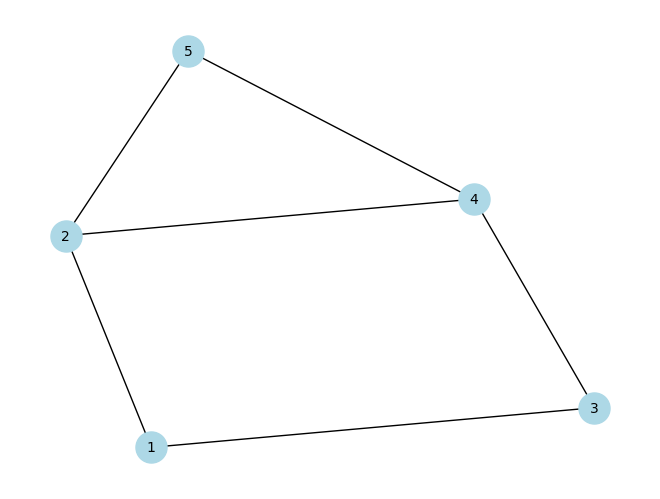

False


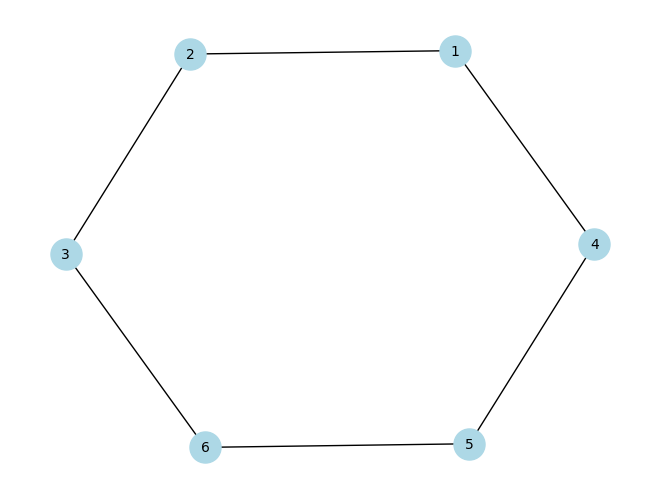

True


In [10]:
def bipartite(graph,node,visited,color,c):
    visited[node] = 1 
    color[node] = c 
    for child in graph[node]:
        if not visited[child]:
            temp = bipartite(graph=graph,node=child,visited=visited,color=color,c=c^1)
            if temp == False:
                return False
        else:
            if color[node] == color[child]:
                return False
    return True

# ====================================================
ipt1 = [[1,2],[2,4],[4,3],[3,1],[2,5],[4,5]]
n1 = 5

ipt2 = [[1,2],[2,3],[3,6],[6,5],[5,4],[1,4]]
n2 = 6 

graph1 = {}
visited1 = {}
color1 = {}

graph2 = {}
visited2 = {}
color2 = {}

for i in range(1,n1+1):
    graph1[i] = []
    visited1[i] = 0 
    color1[i] = None

for u,v in ipt1:
    graph1[u].append(v)
    graph1[v].append(u)

for i in range(1,n2+1):
    graph2[i] = []
    visited2[i] = 0 
    color2[i] = None
    
for u,v in ipt2:
    graph2[u].append(v)
    graph2[v].append(u)
    
# Create a NetworkX graph
G1 = nx.Graph()
for u, v in ipt1:
    G1.add_edge(u, v)
    
# Draw the graph
pos1 = nx.spring_layout(G1)
nx.draw(G1, pos1, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
plt.show()

temp1 = bipartite(graph=graph1,node=1,visited=visited1,color=color1,c=0)
print(temp1) 

# Create a NetworkX graph
G2 = nx.Graph()
for u, v in ipt2:
    G2.add_edge(u, v)
    
# Draw the graph
pos2 = nx.spring_layout(G2)
nx.draw(G2, pos2, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
plt.show()
   
temp2 = bipartite(graph=graph2,node=1,visited=visited2,color=color2,c=0)
print(temp2) 


### <font color = green|>f.) Cycle Detection

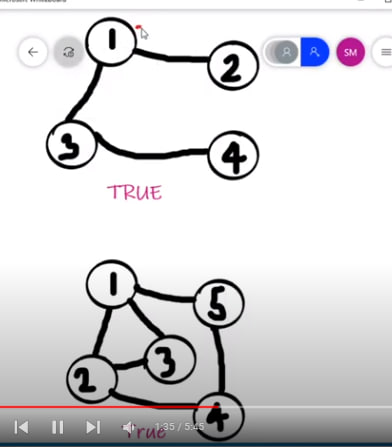 <br>
Refer to the node that can move forward and return back to origin location.

True


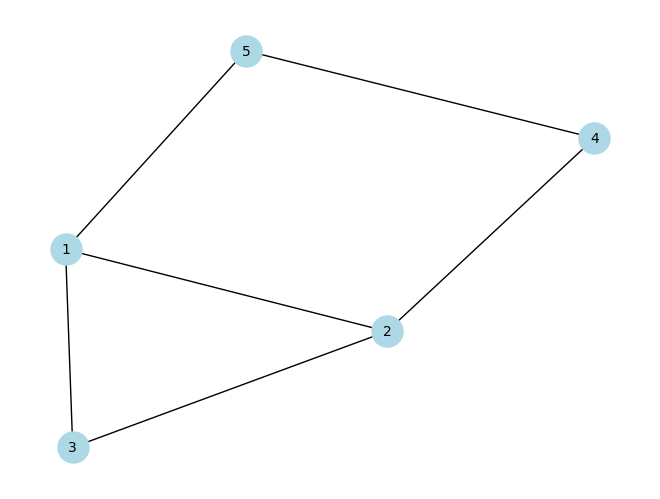

In [11]:
def dfs(graph,node,visited,par):
    visited[node] = True
    for child in graph[node]:
        if not visited[child]:
            return dfs(graph=graph,node=child,visited=visited,par=node)
        else:
            if child !=par:
                return True
    return False

ipt = [[1,2],[1,3],[2,3],[2,4],[4,5],[5,1]]
n = 5 
graph = {}
visited = {}

for i in range(1,n+1):
    graph[i] = []
    visited[i] = False

for (u,v) in ipt:
    graph[u].append(v)
    graph[v].append(u)

temp = dfs(graph=graph,node=1,visited=visited,par=-1)
print(temp)

# Create a NetworkX graph
G = nx.Graph()
for u, v in ipt:
    G.add_edge(u, v)
    
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
plt.show()

### <font color = green|>g.) In/Out Time of a tree <br>
- In time is the time of arrival of a node<br>
- Out time is the time of departure of a node.<br>
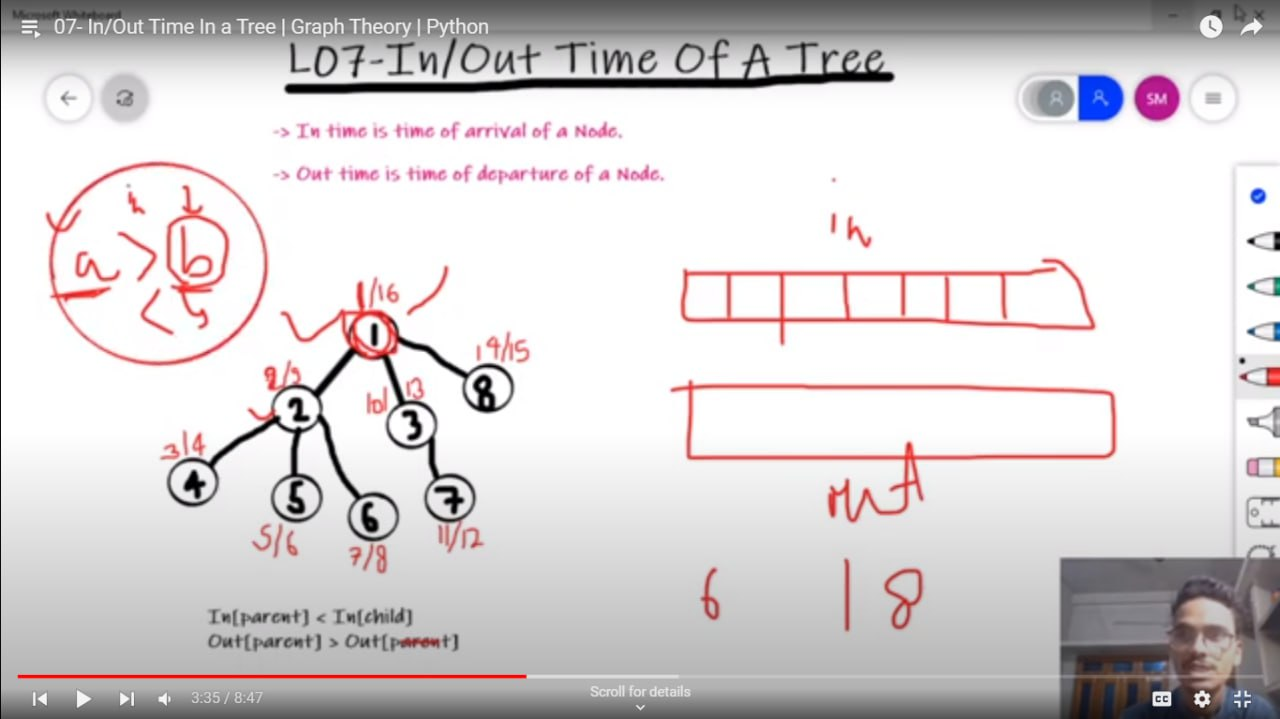

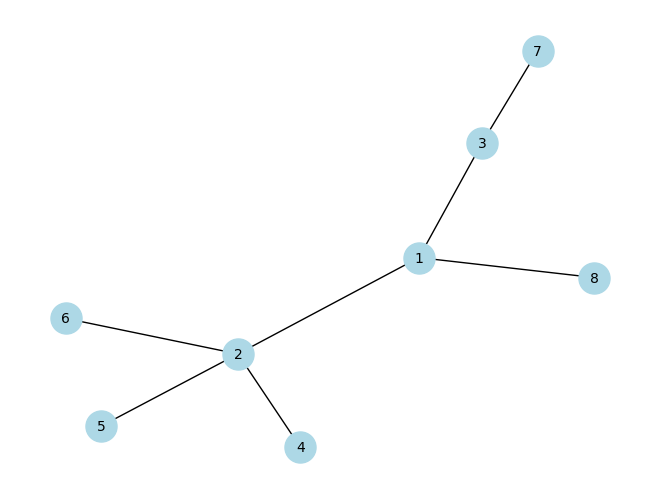

intime :
 {1: 1, 2: 2, 3: 10, 4: 3, 5: 5, 6: 7, 7: 11, 8: 14}
outtime :
 {1: 16, 2: 9, 3: 13, 4: 4, 5: 6, 6: 8, 7: 12, 8: 15}


In [12]:
def dfs(graph,node,visited,intime,outtime):
    global timer 
    intime[node] = timer
    timer += 1 
    visited[node] = True 
    
    for child in graph[node]:
        if not visited[child]:
            dfs(graph=graph,node=child,visited=visited,intime=intime,outtime=outtime)
    
    outtime[node] = timer 
    timer += 1 

ipt = [[1,2],[2,4],[2,5],[2,6],[1,3],[3,7],[1,8]]
n = 8
 
graph = {}
visited = {}
outtime = {}
intime = {}
timer = 1 

for i in range(1,n+1):
    graph[i] = []
    visited[i] = False
    intime[i] = None
    outtime[i] = None

for (u,v) in ipt:
    graph[u].append(v)
    graph[v].append(u)

# Create a NetworkX graph
G = nx.Graph()
for u, v in ipt:
    G.add_edge(u, v)
    
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
plt.show()
    
dfs(graph=graph,node=1,visited=visited,intime=intime,outtime=outtime)
print(f'intime :\n {intime}')
print(f'outtime :\n {outtime}')

### <font color = green|>h.) Diameter of a Tree <br>
- Diameter of a tree is longest distance between two nodes in a tree.
- Method 1: Calculate distance of longest node from every node and find maximum.
- Method 2: Use two times Method 1.<br>
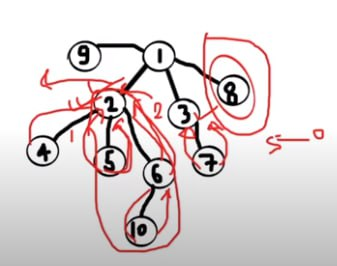

[4, 10]


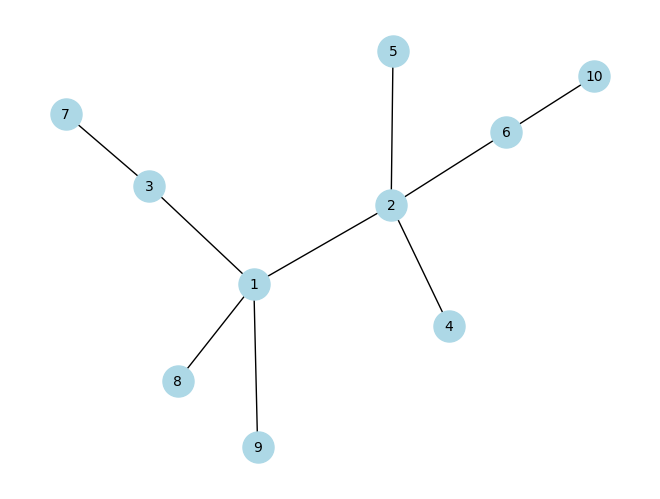

In [13]:
def dfs(graph,visited,node):
    visited[node] = True 
    sm = 0 
    for child in graph[node]:
        if not visited[child]:
            sm = max(sm,dfs(graph=graph,visited=visited,node=child))
    return sm + 1 

def dfs1(graph,visited,node):
    visited[node] = True 
    sm = 0 
    temp = node 
    for child in graph[node]:
        if not visited[child]:
            tvalue,tnode = dfs1(graph=graph,visited=visited,node=child)
            if tvalue >sm:
                temp = tnode 
                sm = tvalue
    return [sm+1,temp] 


ipt = [[1,2],[2,4],[2,5],[2,6],[1,3],[3,7],[1,8],[6,10],[1,9]]
graph = {}
visited = {}
n = 10

for i in range(1,n+1):
    graph[i] = []
    visited[i] = False

for (u,v) in ipt:
    graph[u].append(v)
    graph[v].append(u)
    
temp = dfs1(graph=graph,visited=visited,node=1)
print(temp)

# Create a NetworkX graph
G = nx.Graph()
for u, v in ipt:
    G.add_edge(u, v)
    
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
plt.show()

### <font color = green|>i.) Calculate SubTree Size <br>

{4: 1, 5: 1, 10: 1, 6: 2, 2: 5, 7: 1, 3: 2, 8: 1, 9: 1, 1: 10}


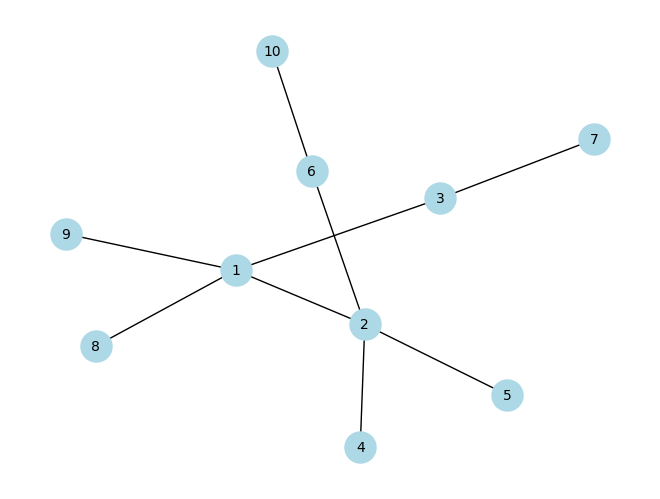

In [14]:
def dfs(graph,visited,node,distance):
    visited[node] = True 
    sm = 0 
    for child in graph[node]:
        if not visited[child]:
            sm = sm + dfs(graph=graph,visited=visited,node=child,distance=distance)

    distance[node] = sm+1
    return sm + 1 

ipt = [[1,2],[2,4],[2,5],[2,6],[1,3],[3,7],[1,8],[6,10],[1,9]]
graph = {}
visited = {}
distance = {}
n = 10

for i in range(1,n+1):
    graph[i] = []
    visited[i] = False

for (u,v) in ipt:
    graph[u].append(v)
    graph[v].append(u)
    
dfs(graph=graph,visited=visited,node=1,distance=distance)
print(distance)

# Create a NetworkX graph
G = nx.Graph()
for u, v in ipt:
    G.add_edge(u, v)
    
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
plt.show()

### <font color = green|>j.) Finding Bridges <br>
`Bridge refer to the path that connect from one set to another set.`

Bridge  3 - 5
None


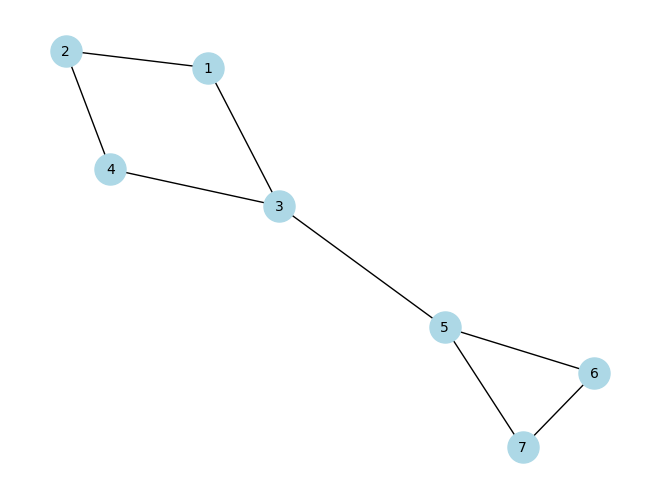

In [15]:
def dfs(graph,node,visited,intime,lowtime,par):
    global timer
    visited[node] = True 
    intime[node] = timer
    lowtime[node] = timer
    timer += 1 
      
    for child in graph[node]:
        
        if not visited[child]:
            dfs(graph=graph,node=child,visited=visited,intime=intime,lowtime=lowtime,par=node)
            
            if intime[node]<lowtime[child]:
                print("Bridge ",node,'-',child)
                
            lowtime[node] = min(lowtime[node],lowtime[child])
            
        else:
            if child !=par:
                lowtime[node] = min(lowtime[node],intime[child])    

# ===============================================================================================
ipt = [[1,2],[1,3],[2,4],[3,4],[3,5],[5,6],[5,7],[6,7]]
n = 7

graph = {}
visited = {}
intime = {}
lowtime = {}

for i in range(1,n+1):
    graph[i] = []
    visited[i] = False
    intime[i] = None
    lowtime[i] = None

for (u,v) in ipt:
    graph[u].append(v)
    graph[v].append(u)

timer = 1 
print(dfs(graph=graph,node=1,visited=visited,intime=intime,lowtime=lowtime,par=-1))

# Create a NetworkX graph
G = nx.Graph()
for u, v in ipt:
    G.add_edge(u, v)
    
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
plt.show()

### <font color = green|>k.) Articulation Point <br></font>
`An articulation point, also known as an articulation vertex or cut vertex, is a specific type of vertex in a graph whose removal would increase the number of connected components in the graph. In simpler terms, it is a vertex such that if you were to remove it from the graph, the graph would become disconnected, or more precisely, it would be divided into two or more separate connected components.`

`Articulation points are primarily relevant in the context of connected graphs, and they have significance in understanding the structure and connectivity of graphs. They often have applications in network design, reliability analysis, and understanding the robustness of a network.`

`Here are some key points about articulation points:`
- `Definition: An articulation point is a vertex in a graph that, if removed, would increase the number of connected components in the graph.`
- `Importance: Articulation points help identify critical points in a network where the removal of a single node can lead to a significant change in the network's connectivity.`
- `Applications: Articulation points are used in various applications, including network design, routing algorithms, and fault tolerance analysis in communication networks.`
- `Graph Types: Articulation points are more commonly associated with undirected graphs. In directed graphs, the equivalent concept is called a "cut vertex."`
- `Algorithms: Several algorithms can be used to find articulation points in a graph, with the most common one being Tarjan's algorithm and depth-first search (DFS) based methods.`
- `Use Cases: Identifying articulation points is valuable in optimizing network design to ensure that the network remains connected even when certain nodes fail. It's also important in understanding the structure and vulnerabilities of complex systems.`

`In summary, articulation points are crucial in graph theory for understanding graph connectivity and are used in various practical scenarios to improve network resilience and reliability.`

A.P.->2
None


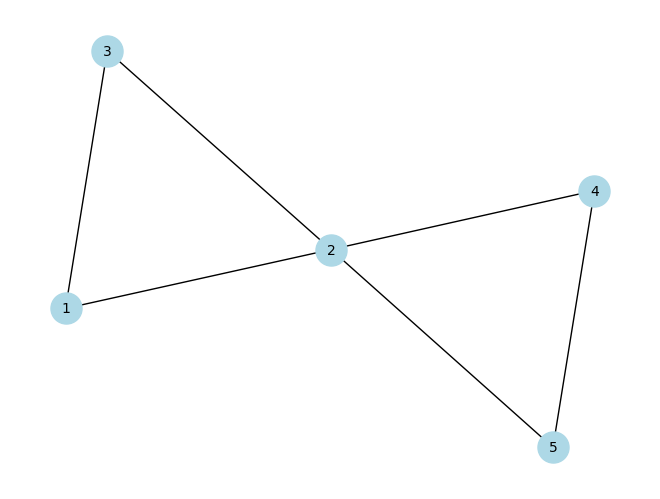

In [16]:
def dfs(graph,node,visited,par,intime,lowtime):
    global timer
    global root
    visited[node] = True 
    intime[node] = timer
    lowtime[node] = timer
    timer += 1 
    c = 0
      
    for child in graph[node]:
        
        if not visited[child]:
            if node==root:
                c+=1
            dfs(graph=graph,node=child,visited=visited,par=node,intime=intime,lowtime=lowtime)
            
            if intime[node]<=lowtime[child] and node!=root:
                print("A.P.->{}".format(node))
            lowtime[node] = min(lowtime[node],lowtime[child])
            
        else:
            if child !=par:
                lowtime[node] = min(lowtime[node],intime[child])    
    
    if c>1:
        print('A.P.->',node)
        
# ===============================================================================================
ipt = [[1,2],[2,3],[3,1],[2,4],[2,5],[4,5]]
n = 5

graph = {}
visited = {}
intime = {}
lowtime = {}

for i in range(1,n+1):
    graph[i] = []
    visited[i] = False
    intime[i] = None
    lowtime[i] = None

for (u,v) in ipt:
    graph[u].append(v)
    graph[v].append(u)

timer = 1 
root = 1
print(dfs(graph=graph,node=1,visited=visited,par=-1,intime=intime,lowtime=lowtime))

# Create a NetworkX graph
G = nx.Graph()
for u, v in ipt:
    G.add_edge(u, v)
    
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
plt.show()

### <font color = green|>l.) Breadth First Search <br></font>
Breadth-First Search (BFS) is a graph traversal and search algorithm used to explore and analyze the structure of a graph or tree. It operates in a systematic way by visiting all the vertices or nodes of a graph in breadth-first order, starting from a specified source node and moving outward to its neighboring nodes before exploring deeper into the graph. BFS is commonly used to find the shortest path between two nodes in an unweighted graph and to discover connected components.

Key characteristics and steps of BFS include:

1. **Queue Data Structure**: BFS uses a queue data structure to manage the order in which nodes are visited. The source node is initially placed in the queue.

2. **Exploration**: The algorithm starts with the source node and explores its neighbors. It visits all the neighbors of the source node before moving on to their neighbors, and so on.

3. **Level-Based**: BFS explores nodes level by level, which means it first visits all nodes at a given distance from the source before moving on to nodes at a greater distance.

4. **Marking Visited Nodes**: To avoid revisiting nodes, BFS typically marks nodes as visited once they are added to the queue. This ensures that each node is visited only once.

5. **Shortest Path**: When used to find the shortest path between two nodes, BFS will stop as soon as the destination node is reached. This guarantees that the path found is the shortest one.

6. **Connected Components**: BFS can also be used to discover connected components in a graph, helping to identify clusters of nodes that are reachable from one another.

7. **Time Complexity**: In an unweighted graph, the time complexity of BFS is typically O(V + E), where V is the number of vertices (nodes) and E is the number of edges.

Applications of BFS include web crawling, network routing, finding the shortest path in unweighted graphs, and solving various graph-related problems.

Overall, BFS is a fundamental algorithm for traversing and analyzing graphs and trees and is particularly useful in scenarios where you need to explore the immediate neighbors of a node before delving deeper into the structure of the graph.

1
2
3
6
7
8
4
5
9


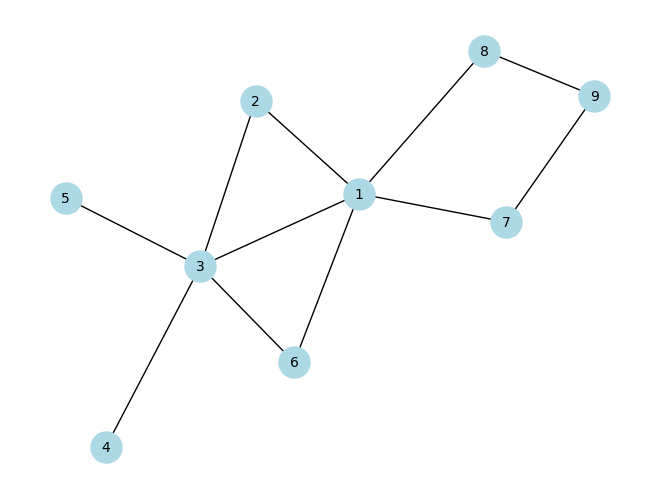

In [17]:
def bfs(graph,visited):
    queue = []
    answer = []
    queue.append(1)
    visited[1] = True 
    
    while queue:
        temp = queue.pop(0)
        print(temp)
        
        for child in graph[temp]:
            if not visited[child]:
                queue.append(child)
                visited[child] = True
                
                
ipt = [[1,2],[1,3],[1,6],[1,7],[1,8],[2,3],[8,9],[9,7],[6,3],[3,4],[3,5]]
graph = {}
visited = {}
n = 9

for i in range(1,n+1):
    graph[i] = []
    visited[i] = False

for (u,v) in ipt:
    graph[u].append(v)
    graph[v].append(u)

bfs(graph=graph,visited=visited)

# Create a NetworkX graph
G = nx.Graph()
for u, v in ipt:
    G.add_edge(u, v)
    
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
plt.show()

1
2
8
6
7
3
9
4
5


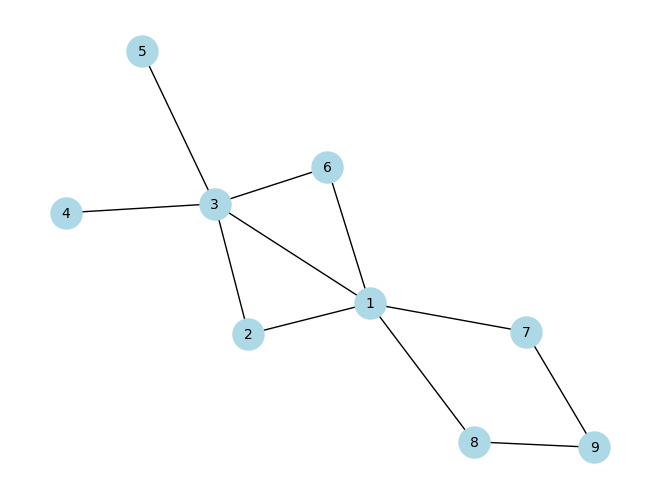

In [18]:
def bfs(graph,visited):
    queue = []
    queue.append(1)
    visited[1] = True 
    
    while queue:
        temp = queue.pop(0)
        print(temp)
        
        for child in graph[temp]:
            if not visited[child]:
                queue.append(child)
                visited[child] = True
                
                
ipt = [[1,2],[1,8],[1,6],[1,7],[1,3],[8,9],[9,7],[6,3],[3,4],[3,5],[2,3]]
graph = {}
visited = {}
n = 9

for i in range(1,n+1):
    graph[i] = []
    visited[i] = False

for (u,v) in ipt:
    graph[u].append(v)
    graph[v].append(u)

bfs(graph=graph,visited=visited)

# Create a NetworkX graph
G = nx.Graph()
for u, v in ipt:
    G.add_edge(u, v)
    
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
plt.show()

### <font color = green|>m.) Topological Search using Kahn's Algorithm <br></font>
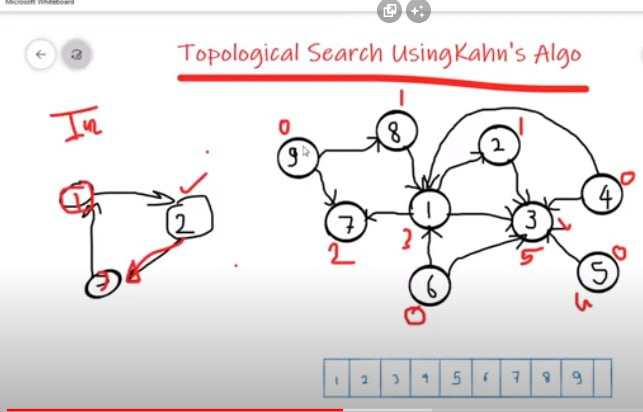

1
2
8
6
9
3
7
4
5


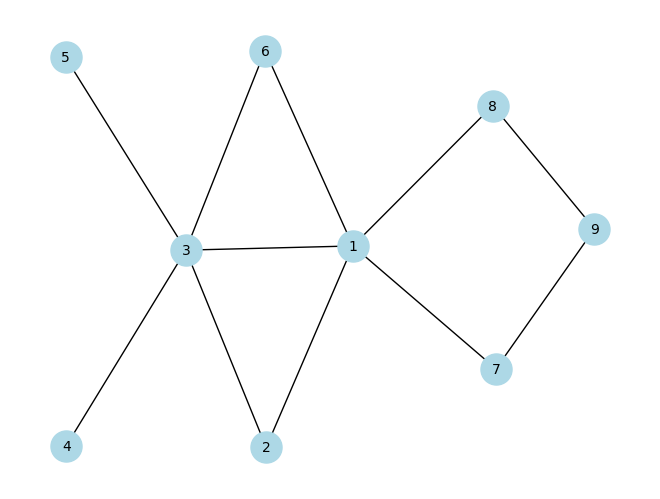

In [19]:
def kahn(graph,visited,indegree):
    queue = []
    for key in visited:
        if indegree[key]==0:
            queue.append(key)
            visited[key] = True
    
    while queue:
        temp = queue.pop(0)
        print(temp)
        
        for child in graph[temp]:
            if not visited[child]:
                indegree[child] -= 1
                if indegree[child] == 0:
                    queue.append(child)
                    visited[child] = True
                
                
ipt = [[1,2],[1,8],[1,6],[1,7],[1,3],[8,9],[9,7],[6,3],[3,4],[3,5],[2,3]]

graph = {}
visited = {}
indegree = {}
n = 9

for i in range(1,n+1):
    graph[i] = []
    visited[i] = False
    indegree[i] = 0

for (u,v) in ipt:
    graph[u].append(v)
    indegree[v] += 1

kahn(graph=graph,visited=visited,indegree=indegree)

# Create a NetworkX graph
G = nx.Graph()
for u, v in ipt:
    G.add_edge(u, v)
    
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
plt.show()

### <font color = green|>n.) Introduction to 2-D grid<br></font>
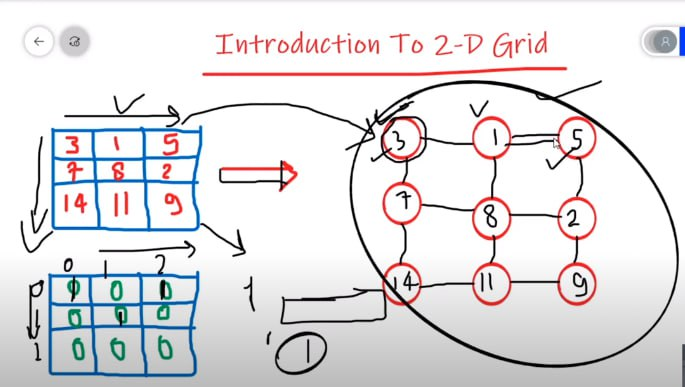

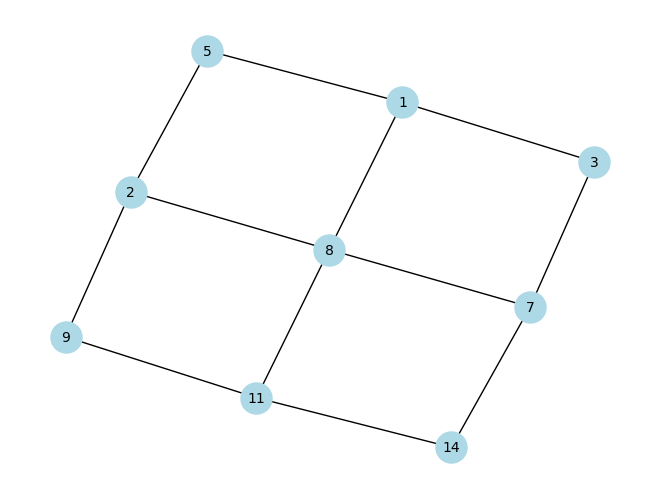

In [20]:
ipt = [[3,1],[3,7],[1,8],[1,5],[7,8],[7,14],[8,11],[8,2],[14,11],[11,9],[9,2],[5,2]]

graph = {}
visited = {}
n = 14

for i in range(1,n+1):
    graph[i] = []
    visited[i] = False

for (u,v) in ipt:
    graph[u].append(v)
    graph[v].append(u)

# Create a NetworkX graph
G = nx.Graph()
for u, v in ipt:
    G.add_edge(u, v)
    
# Draw the graph
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=500, font_size=10)
plt.show()

### <font color = green|>o.) Depth First Search on 2-D Grid<br></font>

In [21]:
def isvalid(grid, visited, x, y):
    row = len(grid)
    col = len(grid[0])
    if x < 0 or y < 0 or x >= row or y >= col or visited[x][y] == 1:
        return False
    return True

def dfs(grid, visited, start):
    i, j = start[0], start[1]
    print(grid[i][j])
    visited[i][j] = 1

    if isvalid(grid=grid, visited=visited, x=i, y=j+1):
        dfs(grid=grid, visited=visited, start=(i, j+1))

    if isvalid(grid=grid, visited=visited, x=i, y=j-1):
        dfs(grid=grid, visited=visited, start=(i, j-1))

    if isvalid(grid=grid, visited=visited, x=i+1, y=j):
        dfs(grid=grid, visited=visited, start=(i+1, j))

    if isvalid(grid=grid, visited=visited, x=i-1, y=j):
        dfs(grid=grid, visited=visited, start=(i-1, j))

# Define the grid as a 2D list
grid = [[3, 1, 5], [7, 8, 2], [14, 11, 9]]
row = len(grid)
col = len(grid[0])
visited = []

for _ in range(row):
    temp = []
    for _ in range(col):
        temp.append(0)
    visited.append(temp)

dfs(grid=grid, visited=visited, start=(0, 0))


3
1
5
2
8
7
14
11
9


### <font color = green|>p.) Breadth First Search on 2-D Grid<br></font>
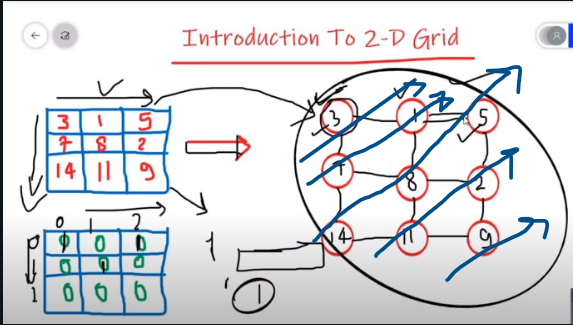

In [22]:
def isvalid(grid, visited, x, y):
    row = len(grid)
    col = len(grid[0])

    if x < 0 or y < 0 or x >= row or y >= col or visited[x][y] == 1:
        return False

    return True

def bfs(grid, visited, start):
    queue = []
    i, j = start[0], start[1]
    queue.append(start)
    visited[i][j] = 1

    while queue:
        a, b = queue.pop(0)
        print(grid[a][b])

        for k, l in [[1, 0], [0, 1], [-1, 0], [0, -1]]:
            if isvalid(grid=grid, visited=visited, x=a + k, y=b + l):
                queue.append((a + k, b + l))
                visited[a + k][b + l] = 1

# Define the grid as a 2D list
grid = [[3, 1, 5], [7, 8, 2], [14, 11, 9]]
row = len(grid)
col = len(grid[0])
visited = []

for _ in range(row):
    temp = []
    for _ in range(col):
        temp.append(0)
    visited.append(temp)

bfs(grid=grid, visited=visited, start=(0, 0))


3
7
1
14
8
5
11
2
9


### <font color = green|>p.)Types of Questions on 2-D Grid<br></font>
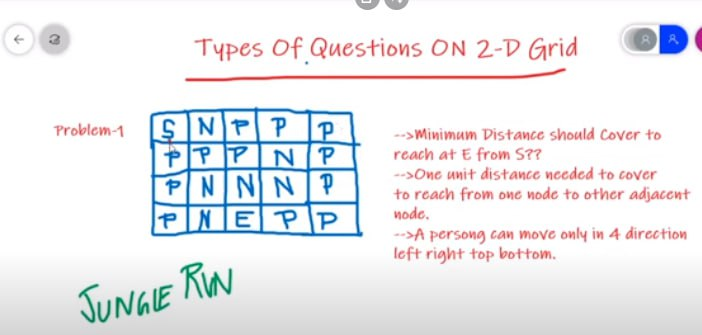 <br>

In [23]:
def isvalid(grid, visited, x, y):
    row = len(grid)
    col = len(grid[0])
    if x < 0 or y < 0 or x >= row or y >= col or visited[x][y] == 1 or grid[x][y] == 'N':
        return False
    return True

def bfs(grid, visited, start, end):
    row, col = len(grid), len(grid[0])
    queue = []
    queue.append(start)
    visited[start[0]][start[1]] = 1
    distance = [[0 for _ in range(col)] for _ in range(row)]

    while queue:
        a, b = queue.pop(0)
        for u, v in [[1, 0], [0, 1], [-1, 0], [0, -1]]:
            if isvalid(grid=grid, visited=visited, x=a+u, y=b+v):
                queue.append((a+u, b+v))
                visited[a+u][b+v] = 1
                distance[a+u][b+v] = distance[a][b] + 1

    print(distance[end[0]][end[1]])

# Define the grid as a list of lists
grid = [['S', 'N', 'P', 'P', 'P'],
        ['P', 'P', 'P', 'N', 'P'],
        ['P', 'N', 'N', 'N', 'P'],
        ['P', 'N', 'E', 'P', 'P']]

row = len(grid)
col = len(grid[0])

visited = [[0 for _ in range(col)] for _ in range(row)]

start, end = None, None

for i in range(row):
    for j in range(col):
        if grid[i][j] == 'S':
            start = (i, j)
        if grid[i][j] == 'E':
            end = (i, j)

bfs(grid=grid, visited=visited, start=start, end=end)


11


`Minimum distance from S to E is 11 unit distances.`

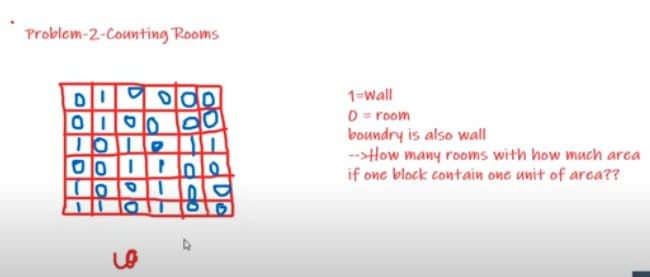

In [24]:
def isvalid(grid, visited, x, y):
    row = len(grid)
    col = len(grid[0])
    
    if x<0 or y<0 or x>=row or y>=col or grid[x][y]==1 or visited[x][y]==1:
        return False
    
    return True

def dfs(grid, visited, start):
    i,j = start[0], start[1]
    visited[i][j] = 1
    sm = 0 
    
    for a,b in [[1,0],[0,1],[-1,0],[0,-1]]:
        if isvalid(grid=grid,visited=visited,x=i+a,y=j+b):
            sm += dfs(grid=grid,visited=visited,start=(i+a,j+b))
    
    return sm+1 

# Define the grid as a list of lists
grid = [[0,1,0,0,0,0],[0,1,0,0,0,0],[1,0,1,0,1,1],[0,0,1,1,0,0],[1,0,0,1,0,0],[1,1,0,1,0,0]]
row = len(grid)
col = len(grid[0])
visited = []

for _ in range(row):
    temp = []
    
    for _ in range(col):
        temp.append(0)
    visited.append(temp)

answer = []
for i in range(row):
    for j in range(col):
        if visited[i][j] == 0 and grid[i][j]==0:
            temp = dfs(grid=grid,visited=visited,start=(0,0))
            answer.append(temp)
print(answer)
num = 0 
for x in answer:
    num = num+x
print(f'The number of room is : {num}')

[2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
The number of room is : 23


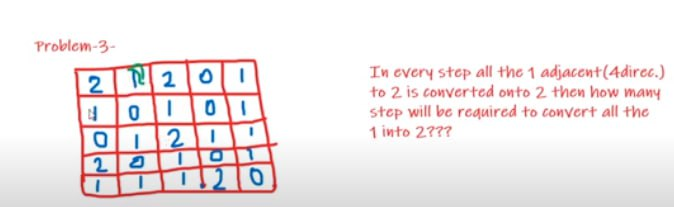

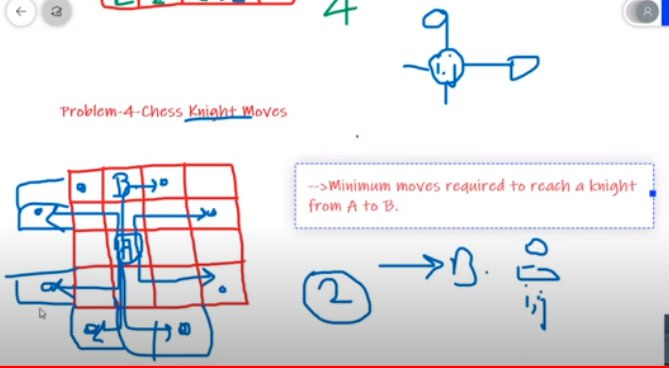

In [25]:
child = [[2,1],[-2,1],[-1,2],[1,2],[2,-1],[-2,-1],[-1,-2],[1,-2]]

def isvalid(grid, visited, x, y):
    row = len(grid)
    col = len(grid[0])
    
    if x<0 or y<0 or x>=row or y>=col or visited[x][y]==1:
        return False
    
    return True

def bsf(grid,visited,distance,start,end):
    global child 
    i,j = start[0], start[1]
    queue = []
    queue.append((i,j))
    visited[i][j] = 1 
    distance[i][j] = 0 
    
    while queue:
        x,y = queue.pop(0)
        for u,v in child:
            if isvalid(grid=graph,visited=visited,x=x+u,y=y+v):
                queue.append((x+u,y+v))
                visited[x+u][y+v] = 1 
                distance[x+u][y+v] = distance[x][y] + 1

    for item in distance:
        print(item)

# ==========================================================================
grid = [['','B','',''],['','','',''],['','A','',''],['','','','']]
visited = []
distance = []
row = len(grid)
col = len(grid[0])

for i in range(row):
    t1 = []    
    t2 = []    
    
    for j in range(col):
        t1.append(0)
        t2.append(-1)
    
    visited.append(t1)
    distance.append(t2)

for i in range(row):
    for j in range(col):
        if grid[i][j] == 'A':
            start = (i,j)
        if grid[i][j] == 'B':
            end = (i,j)

bfs(grid=grid,visited=visited,start=start,end=end)      
                

2


### <font color = green|>q.) Minimum spanning tree<br></font>
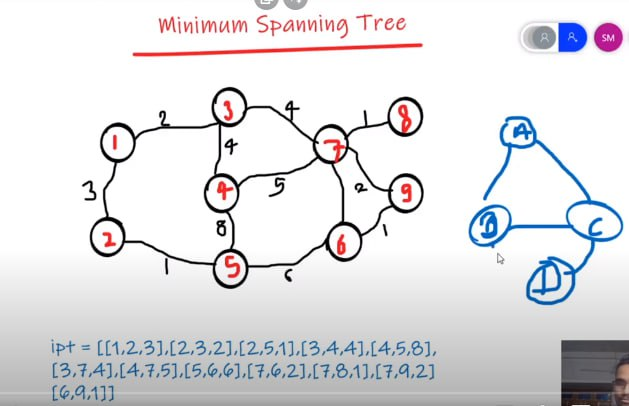

In [26]:
ipt = [[1, 2, 3], 
       [2, 3, 2], 
       [2, 5, 1], 
       [3, 4, 4], 
       [4, 5, 8], 
       [3, 7, 4], 
       [4, 7, 5], 
       [5, 6, 6], 
       [7, 6, 2], 
       [7, 8, 1], 
       [7, 9, 2], 
       [6, 9, 1]
    ]
n = 9  # Change n to 9 to match the number of nodes
graph = {}

for i in range(1, n + 1):
    graph[i] = []

for u, v, d in ipt:
    graph[u].append((d, v))
    graph[v].append((d, u))
graph

{1: [(3, 2)],
 2: [(3, 1), (2, 3), (1, 5)],
 3: [(2, 2), (4, 4), (4, 7)],
 4: [(4, 3), (8, 5), (5, 7)],
 5: [(1, 2), (8, 4), (6, 6)],
 6: [(6, 5), (2, 7), (1, 9)],
 7: [(4, 3), (5, 4), (2, 6), (1, 8), (2, 9)],
 8: [(1, 7)],
 9: [(2, 7), (1, 6)]}

### <font color = green|>r.)Disjoint set<br></font>

In [27]:
def find(graph,node):
    if graph[node]<0:
        return node 
    else:
        temp = find(graph=graph,node=graph[node])
        graph[node] = temp 
        return temp

def union(graph,a,b):
    ta = a 
    tb = b 
    a = find(graph=graph,node=a)
    b = find(graph=graph,node=b)
    
    if a==b:
        print('cannot connect because its part of the same family',ta,tb)
    else:
        if graph[a]==graph[b]:
            graph[b] = graph[b]+graph[a]
            graph[a] = b 
        else:
            if graph[a]<graph[b]:
                graph[a] = graph[a] + graph[b]
                graph[b] = a
            else:
                graph[b] = graph[b] + graph[a]
                graph[a] = b            
n = 7
graph = {}

for i in range(7):
    graph[i] = -1

ipt = [[0,1],[1,2],[2,3],[4,5],[1,3]]

for u,v in ipt:
    union(graph,u,v)
print(graph)

cannot connect because its part of the same family 1 3
{0: 1, 1: -4, 2: 1, 3: 1, 4: 5, 5: -2, 6: -1}


### <font color = green|>s.) Kruskal Algorithm <br></font>
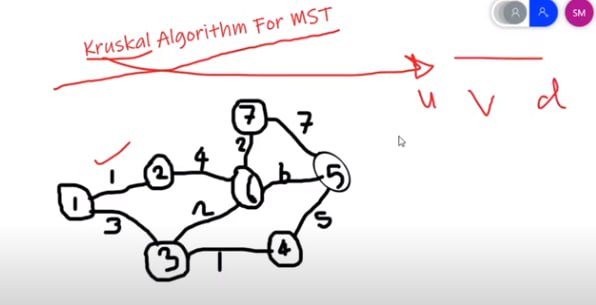
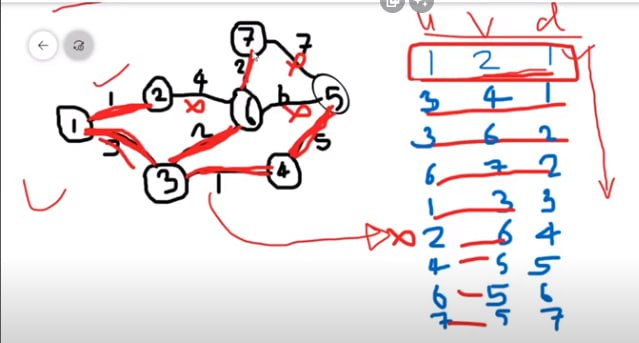

Original components of graph:

[1, 2, 1]
[3, 4, 1]
[3, 6, 2]
[6, 7, 2]
[1, 3, 3]
[2, 6, 4]
[4, 5, 5]
[6, 5, 6]
[7, 5, 7]


Afer Kruskal Algorithm implement:

[1, 2]
[3, 4]
[3, 6]
[6, 7]
[1, 3]
[4, 5]


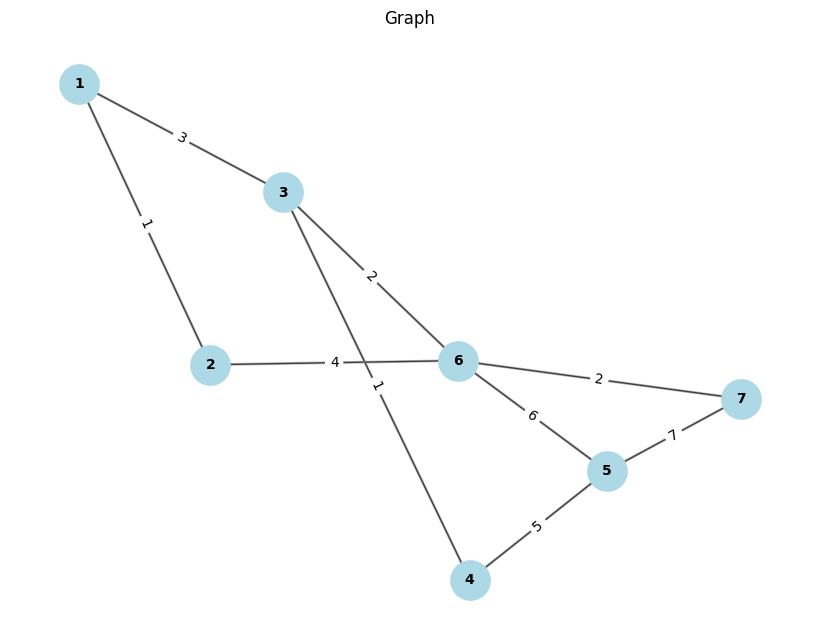

In [38]:
def find(graph,node):
    
    if graph[node]<0:
        return node 
    else:
        temp = find(graph=graph,node=graph[node])
        graph[node] = temp 
        return temp 
# =====================================================
def union(graph,a,b,answer):
    ta = a 
    tb = b 
    a = find(graph=graph,node=a)  
    b = find(graph=graph,node=b)  

    if a==b:
        pass
    else:
        answer.append([ta,tb])
        if graph[a] == graph[b]:
            graph[a] = graph[a]+graph[b]
            graph[b] = a
        else:
            if graph[a]<graph[b]:
                graph[a] = graph[a] + graph[b]
                graph[b] = a 
            else:
                graph[b] = graph[b] + graph[a]
                graph[a] = b                 
# =====================================================
ipt = [[1,2,1],[3,4,1],[3,6,2],[6,7,2],[1,3,3],[2,6,4],[4,5,5],[6,5,6],[7,5,7]]
n = 7 
answer = []
ipt = sorted(ipt,key=lambda ipt:ipt[2])
graph = [-1] * (n+1)
print('Original components of graph:\n')
for element in ipt:
    print(element)
# =====================================================
print('\n')
print('Afer Kruskal Algorithm implement:\n')
for u,v,d in ipt:
    union(graph=graph,a=u,b=v,answer=answer)

for item in answer:
    print(item)
    
G = nx.Graph()  # Create a graph object

for u, v, d in ipt:
    union(graph=graph, a=u, b=v, answer=answer)
    G.add_edge(u, v, weight=d)  # Add edges to the graph

# Draw the graph
pos = nx.spring_layout(G)  # Position nodes using the spring layout algorithm
labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {edge: labels[edge] for edge in G.edges}

plt.figure(figsize=(8, 6))  # Set the figure size

# Draw nodes and edges
nx.draw(G, pos, with_labels=True, node_color="lightblue", node_size=800, font_size=10, font_color="black", font_weight="bold")
nx.draw_networkx_edges(G, pos, width=2.0, alpha=0.5, edge_color="gray")
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Display the plot
plt.title("Graph")
plt.axis("off")  # Turn off the axis
plt.show()

### <font color = green|>t.) Heap Search <br></font>

It appears you are asking about a heap-based search algorithm for graphs. One commonly used algorithm that involves a heap data structure is Dijkstra's algorithm, which is used for finding the shortest path in a graph with non-negative edge weights. Here's an overview of how Dijkstra's algorithm works with a heap:

`1. Initialize a priority queue (min-heap) to keep track of nodes to visit and their tentative distances. Initially, set the distance of the source node to 0 and the distance of all other nodes to infinity.`

`2. Add the source node to the priority queue with a distance of 0.`

`3. While the priority queue is not empty:`<br>

            - Pop the node with the minimum tentative distance from the priority queue.
            - For each neighbor of the current node, calculate the tentative distance to that neighbor through the current node.
            - If the calculated tentative distance is less than the current distance of the neighbor, update the neighbor's distance and add it to the priority queue.

`4. Continue this process until you have visited all nodes or reached your target node.`

`5. Once you have visited the target node or finished processing all nodes, you will have the shortest path from the source to the target.`
`This algorithm efficiently finds the shortest path in graphs with non-negative weights, and the min-heap helps ensure that you always explore the node with the shortest tentative distance next.`

Please note that this algorithm works for weighted graphs with non-negative edge weights. If the graph contains negative edge weights, other algorithms like the Bellman-Ford algorithm should be used.

In [39]:
from heapq import *
lst = [3,4,5,10,2,1]
bag = []

for item in lst:
    heappush(bag,item)

while bag:
    temp = heappop(bag)
    print(temp)
    

1
2
3
4
5
10


{'A': {'B': 1, 'C': 4}, 'B': {'A': 1, 'C': 2, 'D': 5}, 'C': {'A': 4, 'B': 2, 'D': 1}, 'D': {'B': 5, 'C': 1}}


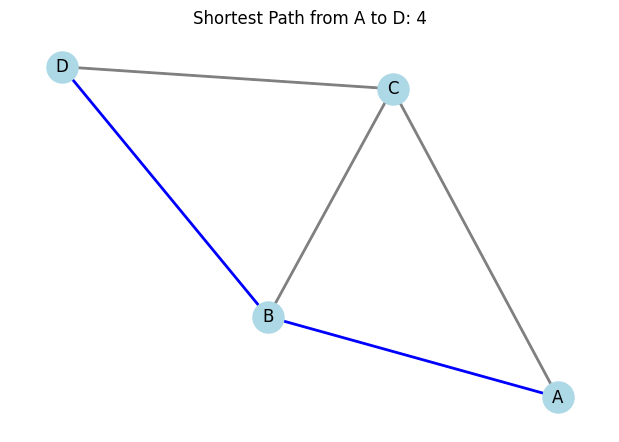

In [47]:
import networkx as nx
import matplotlib.pyplot as plt
import heapq

# Define the graph as an adjacency list
graph = {
    'A': {'B': 1, 'C': 4},
    'B': {'A': 1, 'C': 2, 'D': 5},
    'C': {'A': 4, 'B': 2, 'D': 1},
    'D': {'B': 5, 'C': 1}
}

# Define the source and target nodes
source = 'A'
target = 'D'

# Initialize distances with infinity for all nodes
distances = {node: float('inf') for node in graph}
distances[source] = 0

# Initialize the priority queue (min-heap)
priority_queue = [(0, source)]

while priority_queue:
    current_distance, current_node = heapq.heappop(priority_queue)

    # Skip if we've already found a shorter path to this node
    if current_distance > distances[current_node]:
        continue

    for neighbor, weight in graph[current_node].items():
        distance = current_distance + weight

        # If a shorter path is found, update the distance and add to the priority queue
        if distance < distances[neighbor]:
            distances[neighbor] = distance
            heapq.heappush(priority_queue, (distance, neighbor))

print(graph)
# ========================================================
# Create a NetworkX graph to visualize
G = nx.Graph(graph)
pos = nx.spring_layout(G)  # Position nodes

# Highlight the shortest path
shortest_path = nx.shortest_path(G, source=source, target=target)
edge_colors = ['b' if (u, v) in zip(shortest_path, shortest_path[1:]) else 'gray' for u, v in G.edges()]

# Plot the graph
plt.figure(figsize=(6,4))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12)
nx.draw_networkx_edges(G, pos, width=2.0, edge_color=edge_colors)

# Display the plot
plt.title(f"Shortest Path from {source} to {target}: {distances[target]}")
plt.axis('off')
plt.show()


### <font color = green|>u.) Prim's Algorithm <br></font>
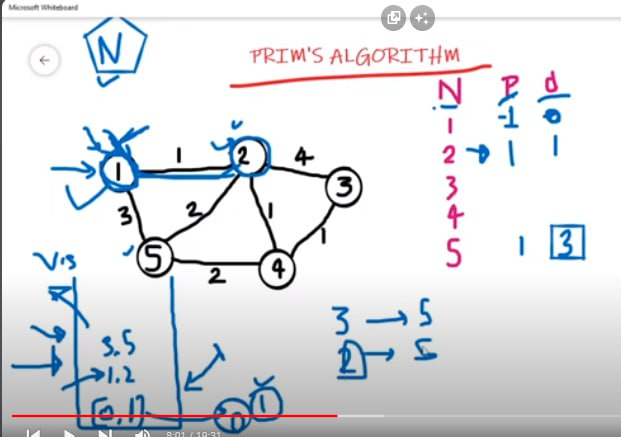

In [50]:
from heapq import * 
def prims(graph,start,parent,distance,visited):
    bag = []
    heappush(bag,[0,start])
    distance[start] = 0 
    parent[start] = -1
    
    while bag:
        d,n = heappop(bag)
        
        if not visited[n]:
            visited[n] = 1 
        
            for cd,cn in graph[n]:
                if distance[cn]>cd and not visited[cn]:
                    parent[cn] = n
                    distance[cn] = cd 
                    heappush(bag,[cd,cn])
    
    print(distance)
    print(parent)
    
ipt = [[1,2,1],[2,3,4],[3,4,1],[4,5,2],[1,5,3],[2,5,2],[2,4,1]]
n = 5 
graph = {}
parent = {}
distance = {}
visited = {}

for i in range(1,n+1):
    graph[i] = []
    parent[i] = None
    distance[i] = 10**8 + 1 
    visited[i] = 0

for u,v,d in ipt:
    graph[u].append([d,v])
    graph[v].append([d,u])

start = 1 
prims(graph=graph,visited=visited,start=start,parent=parent,distance=distance)

{1: 0, 2: 1, 3: 1, 4: 1, 5: 2}
{1: -1, 2: 1, 3: 4, 4: 2, 5: 2}


### <font color = green|>v.) Dijkstra's Algorithm <br></font>
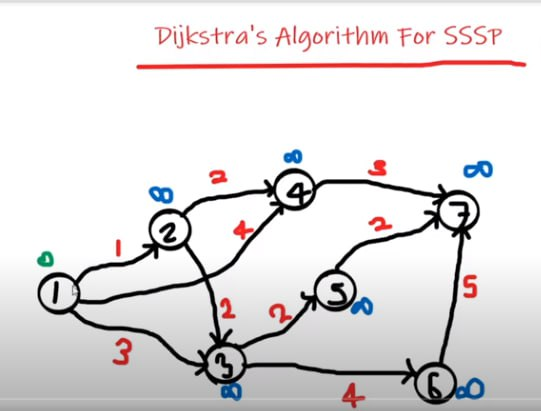

Origin graph:
[1, 3, 2]
[1, 2, 1]
[2, 3, 1]
[2, 5, 1]
[3, 4, 2]
[5, 4, 5]

After Dijkstra implementation:
{1: 0, 2: 1, 3: 2, 4: 4, 5: 2}


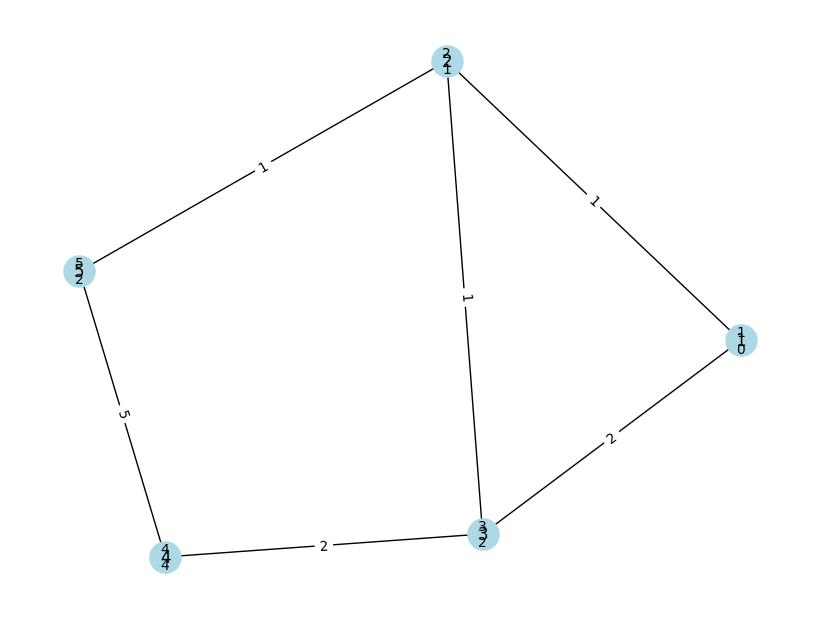

In [81]:
from heapq import *
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra(graph, start, visited, distance):
    distance[start] = 0
    bag = []
    heappush(bag, [0, start])

    while bag:
        d, n = heappop(bag)
        visited[n] = 1

        for cd, cn in graph[n]:
            if not visited[cn] and distance[n] + cd < distance[cn]:
                distance[cn] = distance[n] + cd
                heappush(bag, [distance[n] + cd, cn])

    print(distance)

# Input data
ipt = [[1, 3, 2], [1, 2, 1], [2, 3, 1], [2, 5, 1], [3, 4, 2], [5, 4, 5]]
n = 5
graph = {}
distance = {}
visited = {}

print('Origin graph:')
for element in ipt:
    print(element)

print('\nAfter Dijkstra implementation:')
for i in range(1, n + 1):
    graph[i] = []
    distance[i] = 10**8 + 1
    visited[i] = 0

for u, v, d in ipt:
    graph[u].append([d, v])
    graph[v].append([d, u])

start = 1
dijkstra(graph=graph, start=start, visited=visited, distance=distance)

# Plot the graph
G = nx.Graph()
for u in graph:
    for weight, v in graph[u]:
        G.add_edge(u, v, weight=weight)

pos = nx.spring_layout(G)
labels = {u: f'{u}\n{distance[u]}' for u in G.nodes()}
edge_labels = {(u, v): d['weight'] for u, v, d in G.edges(data=True)}

plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=12)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw_networkx_labels(G, pos, labels=labels, font_size=10, font_color='black')
plt.axis('off')
plt.show()

### <font color = green|>w.) Bellman Ford Algorithm<br></font>
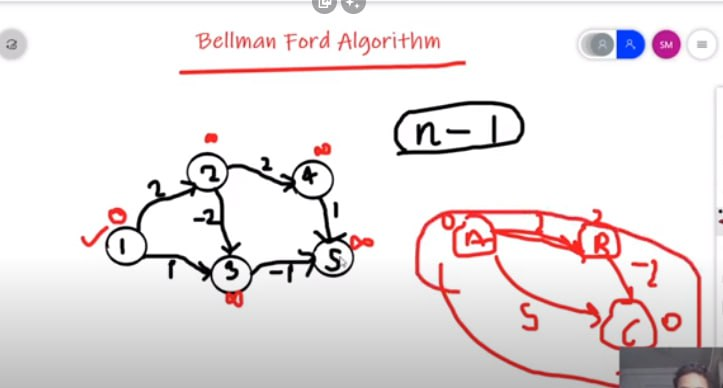

In [82]:
ipt = [[1,2,2],[1,3,1],[2,3,-2],[2,4,2],[3,5,-1],[4,5,1]]
n = 5 
distance = {}

for i in range(1,n+1):
    distance[i] = 10**8 + 1 

distance[1] = 0 
for _ in range(n-1):
    for u,v,d in ipt:
        if distance[u]<10**8 and d+distance[u]<distance[v]:
            distance[v] = d+ distance[u]

print(distance)

{1: 0, 2: 2, 3: 0, 4: 4, 5: -1}


### <font color = green|>x.) Floyd Warshall Algorithm<br></font>
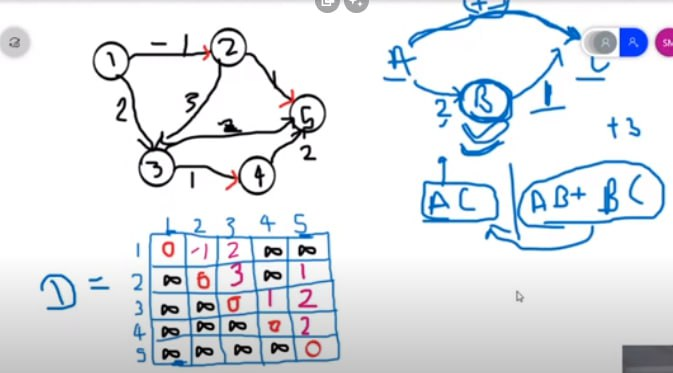
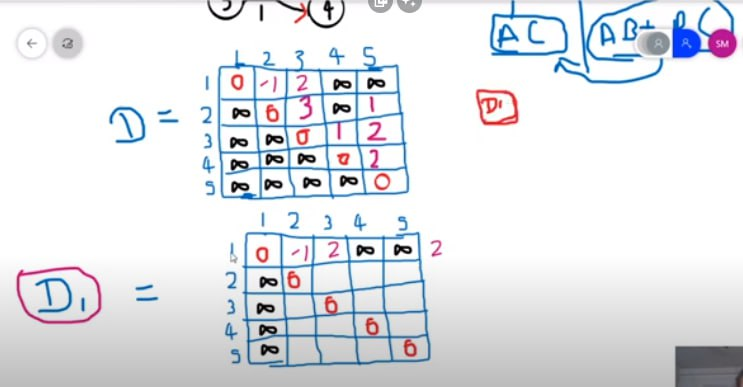

In [87]:
ipt = [[1,3,2],[1,2,-1],[2,3,3],[3,5,2],[2,5,1],[3,4,1],[4,5,2]]
n = 5 
row = n+1
col = n+1 
graph = []

for _ in range(row):
    temp = []
    for _ in range(col):
        temp.append(10**8+1)
    graph.append(temp)

for i in range(row):
    for j in range(col):
        if i==j:
            graph[i][j]=0

for u,v,d in ipt:
    graph[u][v] = d
    
for item in graph:
    print(item)

[0, 100000001, 100000001, 100000001, 100000001, 100000001]
[100000001, 0, -1, 2, 100000001, 100000001]
[100000001, 100000001, 0, 3, 100000001, 1]
[100000001, 100000001, 100000001, 0, 1, 2]
[100000001, 100000001, 100000001, 100000001, 0, 2]
[100000001, 100000001, 100000001, 100000001, 100000001, 0]


### <font color = green|>y.) Tarjan's Algorithm<br></font>

In [93]:
def tarjan(graph,visited,node,parent,par,intime,lowtime):
    global timer 
    visited[node] = 1 
    lst.append(node)
    parent[node] = par 
    intime[node] = timer 
    lowtime[node] = timer 
    
    for child in graph[node]:
        if not visited[child]:
            tarjan(graph=graph,visited=visited,node=child,parent=parent,par=node,intime=intime,lowtime=lowtime) 
        else:
            if child!=par and lowtime[node]<intime[child] and (child in lst):
                lowtime[node] = min([lowtime[node],intime[child]])
            else:
                if child!=par and (child in lst):
                    lowtime[node] = min(lowtime[node],intime[child])
                    
ipt = [[1,2],[2,3],[3,1],[2,4],[5,4]]
n = 5 
graph = {}
visited = {}
parent = {}
intime = {}
lowtime = {}
timer = 1 

for i in range(1,n+1):
    graph[i] = []
    visited[i] = 0 
    parent[i] = None 
    intime[i] = None 
    lowtime[i] = None 
    
for u,v in ipt:
    graph[u].append(v)

for i in range(1,n+1):
    if not visited[i]:
        tarjan(graph=graph,visited=visited,node=i,parent=parent,intime=intime,lowtime=lowtime,par=-1)

print(lowtime)                                    

{1: 1, 2: 1, 3: 1, 4: 1, 5: 1}


# <center> The End !!!